## Julia Ortiz - RM 550204

## Juliana Villalpando Maita - RM 99224

Etapa 01 - ASK
10 perguntas sobre os dados
1. Quais são os ingredientes mais comuns em produtos de
skincare?
2. Quais tipos de pele são mais frequentemente recomendados para esses ingredientes?
3. Quais são os benefícios mais comuns descritos para esses ingredientes?
4. Certos ingredientes estão associados a possíveis contraindicações?
5. Os ingredientes naturais ou sintéticos são mais comuns?
6. Quais ingredientes têm a descrição mais completa?
7. Existem ingredientes recomendados para condições específicas de pele, como acne, rosácea ou envelhecimento?
8. Existe uma relação entre o nome científico e o tipo (natural ou sintético) dos ingredientes?
9. Podemos prever o tipo de pele recomendado para um ingrediente usando técnicas de IA/ML?
10. Há uma correlação entre os benefícios do ingrediente e o tipo de pele?



In [ ]:
# Instalar a Biblioteca kagglehub -> API
!pip install kagglehub


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Configurando as opções do Seaborn para visualizações
sns.set(style='whitegrid')


In [ ]:
# Baixando o dataset mais recente do Kaggle
path = kagglehub.dataset_download("amaboh/skin-care-product-ingredients-inci-list")
print("Path to dataset files:", path)


100%|██████████| 57.3k/57.3k [00:00<00:00, 11.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amaboh/skin-care-product-ingredients-inci-list/versions/1


In [ ]:
# Carregando os dados em um DataFrame do Pandas
file_path = f"{path}/ingredientsList.csv"
data = pd.read_csv(file_path)

# Visualizando as primeiras linhas do DataFrame
data.head()


,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,Alpha-glucan oligosaccharide is in a class of ...,Prebiotics are a type of non-digestible dietar...,Prebiotics offer benefits such as:\r\n\r\n- He...,"[' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness...","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oli...
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as...",Aloe vera is a skincare ingredient derived fro...,Aloe vera offers multiple benefits for the ski...,"[' ', 'Dry and dehydrated skin', ' ', 'Impaire...","[' ', 'Related Allergy']",https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but ca...",Allantoin is a skincare ingredient derived fro...,"Allantoin is a calming, anti-inflammatory, and...","[' ', 'Fine Lines', ' ', 'Impaired skin barrie...","[' ', 'Related Allergy']",https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a lar...",An extract from brown seaweed used as hydratin...,"In skincare products, it is used for its excel...","[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algin
4,Algae Extract,NaN,"It is essentially an underwater plant, designe...",An incredibly interesting natural ingredient s...,Algae extracts are multifunctional ingredients...,"[' ', 'Dry and dehydrated skin', ' ', 'Fine Li...","[' ', 'Related Allergy']",https://renude.co/ingredients/algae-extract


In [ ]:
# Removendo linhas com valores nulos em colunas específicas
data_cleaned = data.dropna(subset=['scientific_name', 'name', 'what_is_it', 'what_does_it_do'])

# Verificando os valores nulos após o tratamento
print("Valores nulos após a limpeza:\n", data_cleaned.isnull().sum())


Valores nulos após a limpeza:
 name                  0
scientific_name       0
short_description     0
what_is_it            0
what_does_it_do       0
who_is_it_good_for    0
who_should_avoid      0
url                   0
dtype: int64




---


Pergunta 1: Quais são os ingredientes mais comuns em produtos de skincare?

<ipython-input-6-6078ea6f29fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='viridis')


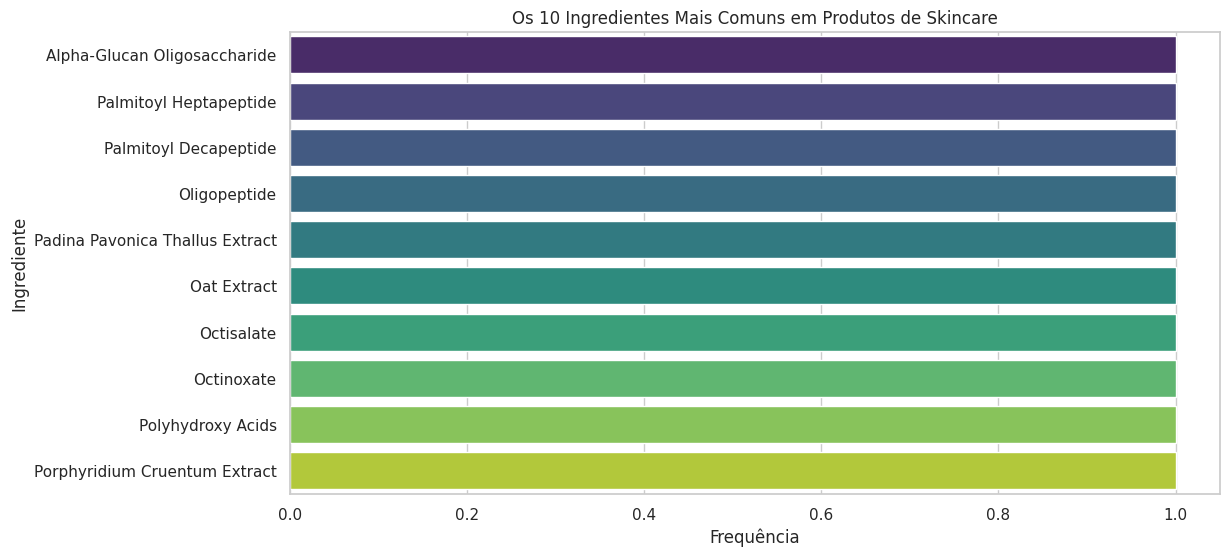

In [ ]:
# Contagem de ingredientes
ingredient_counts = data['name'].value_counts().head(10)  # Os 10 mais comuns

# Visualização dos ingredientes mais comuns
plt.figure(figsize=(12, 6))
sns.barplot(x=ingredient_counts.values, y=ingredient_counts.index, palette='viridis')
plt.xlabel("Frequência")
plt.ylabel("Ingrediente")
plt.title("Os 10 Ingredientes Mais Comuns em Produtos de Skincare")
plt.show()

Explicação: O gráfico apresenta os 10 ingredientes mais comuns encontrados em produtos de skincare, mostrando a frequência de cada um. No eixo x, temos a frequência (número de vezes que o ingrediente aparece), enquanto no eixo y estão os nomes dos ingredientes. A paleta de cores 'viridis' é utilizada para melhorar a visualização.


---



Pergunta 2: Quais tipos de pele são mais frequentemente recomendados para esses ingredientes?

<ipython-input-7-e9db3c5aece6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skin_type_counts.values, y=skin_type_counts.index, palette='viridis')


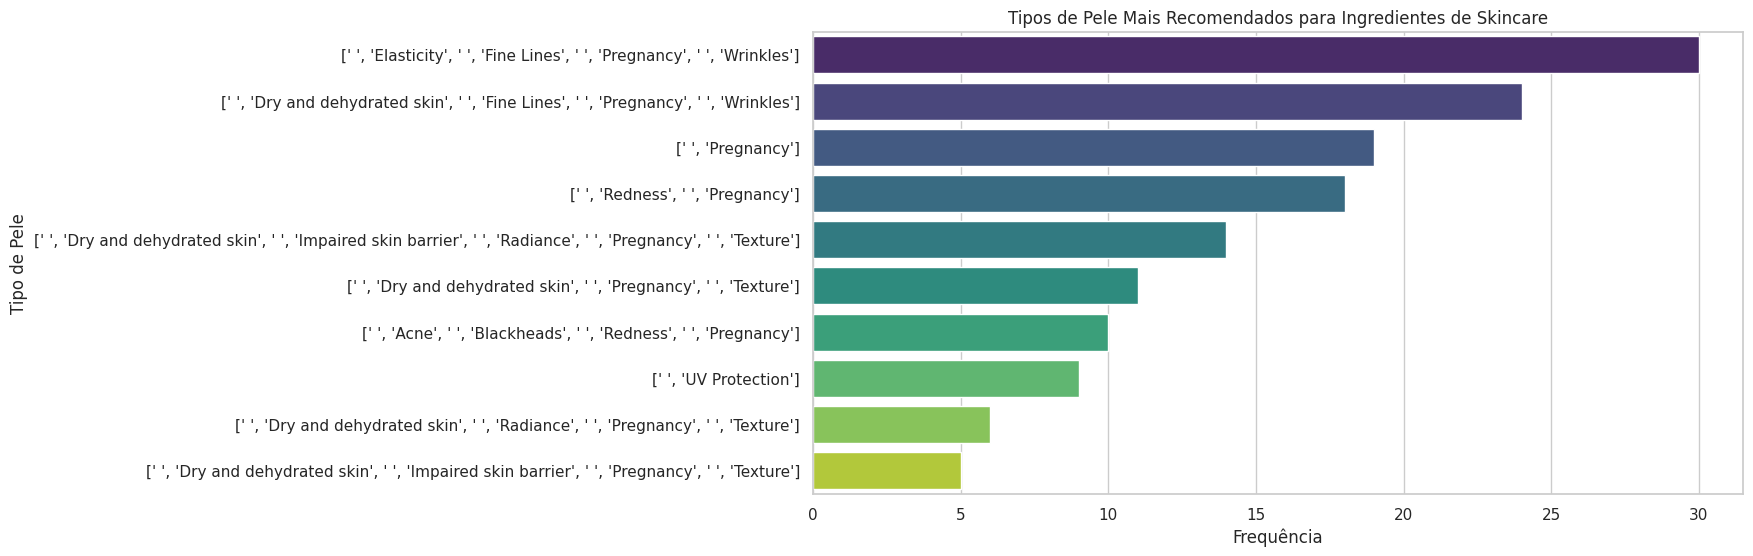

In [ ]:
# Contagem de recomendações de tipo de pele
skin_type_counts = data['who_is_it_good_for'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=skin_type_counts.values, y=skin_type_counts.index, palette='viridis')
plt.xlabel("Frequência")
plt.ylabel("Tipo de Pele")
plt.title("Tipos de Pele Mais Recomendados para Ingredientes de Skincare")
plt.show()

Explicação: Este gráfico mostra os tipos de pele mais recomendados para os ingredientes de skincare. A frequência de recomendações está no eixo x, enquanto os diferentes tipos de pele estão no eixo y. A visualização ajuda a entender quais tipos de pele se beneficiam mais dos ingredientes analisados.


---




Pergunta 3: Quais são os benefícios mais comuns descritos para esses ingredientes?

<ipython-input-8-df2484b955c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=benefit_counts.values, y=benefit_counts.index, palette='viridis')
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


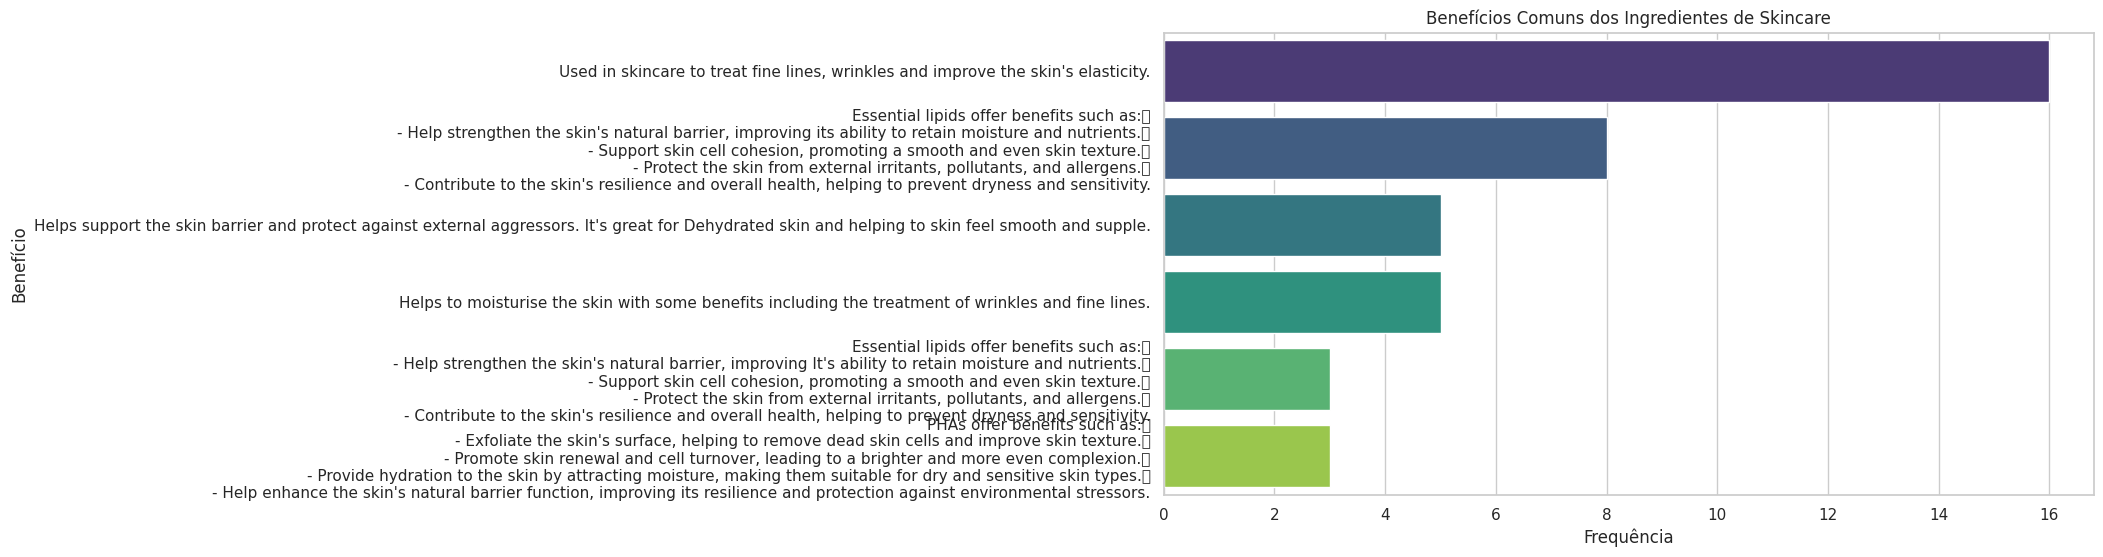

In [ ]:
# Contagem de benefícios
benefit_counts = data['what_does_it_do'].value_counts().head(6)

plt.figure(figsize=(12, 6))
sns.barplot(x=benefit_counts.values, y=benefit_counts.index, palette='viridis')
plt.xlabel("Frequência")
plt.ylabel("Benefício")
plt.title("Benefícios Comuns dos Ingredientes de Skincare")
plt.show()

Explicação:
O gráfico ilustra os benefícios mais comuns associados aos ingredientes de skincare, com até 6 benefícios destacados. No eixo x, está a frequência com que cada benefício é mencionado, enquanto no eixo y estão os tipos de benefícios. Essa visualização permite identificar as propriedades mais valorizadas nos produtos.


---



Pergunta 4: Certos ingredientes estão associados a possíveis contraindicações?

<ipython-input-9-f26336321b70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contraindication_counts.values, y=contraindication_counts.index, palette='viridis')


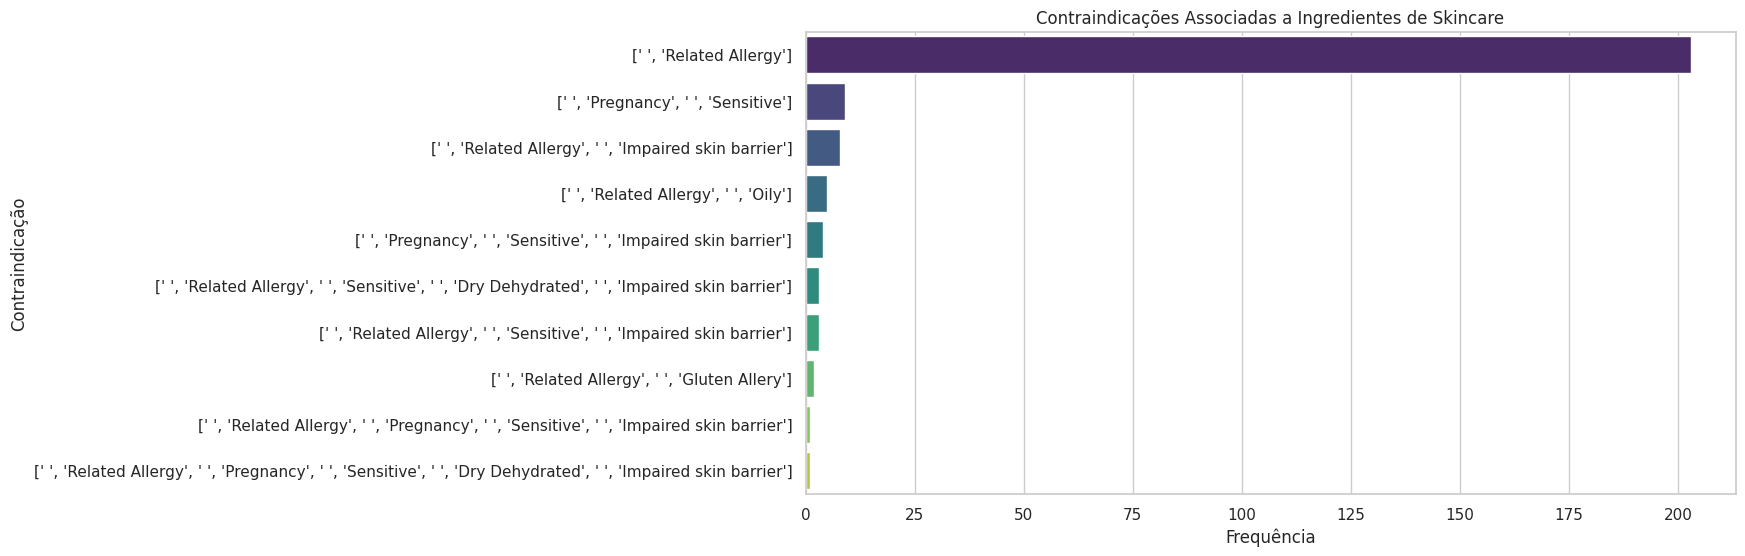

In [ ]:
# Contagem de contraindicações
contraindication_counts = data['who_should_avoid'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=contraindication_counts.values, y=contraindication_counts.index, palette='viridis')
plt.xlabel("Frequência")
plt.ylabel("Contraindicação")
plt.title("Contraindicações Associadas a Ingredientes de Skincare")
plt.show()


Explicação:
Esse gráfico mostra as contraindicações associadas a certos ingredientes de skincare, destacando as 10 contraindicações mais comuns. No eixo x, temos a frequência de cada contraindicação, e no eixo y, os tipos de contraindicações. Isso ajuda a identificar quais ingredientes podem não ser adequados para determinadas pessoas.


---



Pergunta 5: Os ingredientes naturais ou sintéticos são mais comuns?



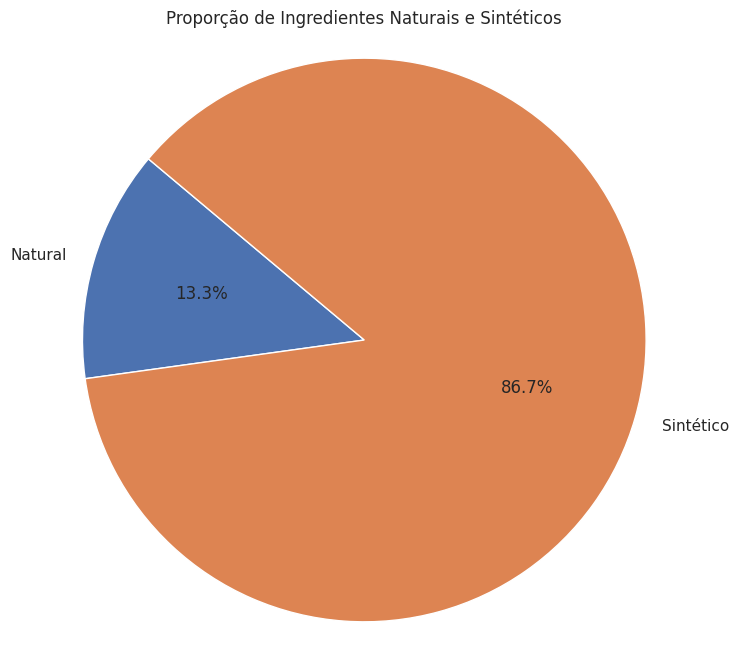

In [ ]:
# Substituir valores NaN
data['scientific_name'] = data['scientific_name'].fillna('unknown')
data['short_description'] = data['short_description'].fillna('unknown')

# Definindo uma função para classificar ingredientes
def classify_type(row):
    if 'plant' in row['scientific_name'].lower() or 'oil' in row['short_description'].lower():
        return 'natural'
    else:
        return 'synthetic'

# Aplicando a função para criar a nova coluna
data['type'] = data.apply(classify_type, axis=1)

# Contando ingredientes naturais e sintéticos
natural_count = data[data['type'] == 'natural'].shape[0]
synthetic_count = data[data['type'] == 'synthetic'].shape[0]

# Plotando a proporção
labels = ['Natural', 'Sintético']
sizes = [natural_count, synthetic_count]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Aspecto igual para o gráfico de pizza
plt.title("Proporção de Ingredientes Naturais e Sintéticos")
plt.show()


Explicação:
Este gráfico de pizza exibe a proporção de ingredientes naturais e sintéticos nos produtos de skincare. Os dados foram classificados com base nos nomes científicos e descrições dos ingredientes, e a contagem de cada tipo foi realizada. As porcentagens são mostradas dentro do gráfico, facilitando a visualização da prevalência de ingredientes naturais em comparação com os sintéticos.



---



Pergunta 6: Quais ingredientes têm a descrição mais completa?

In [ ]:
# Remover valores nulos na coluna 'short_description' para evitar descrições vazias
data_cleaned_desc = data.dropna(subset=['short_description'])

# Ordenar por comprimento da descrição em ordem decrescente
data_cleaned_desc['desc_length'] = data_cleaned_desc['short_description'].apply(len)
top_detailed_descriptions = data_cleaned_desc.sort_values(by='desc_length', ascending=False).head(10)

# Exibir os 10 ingredientes com as descrições mais detalhadas
top_detailed_descriptions[['name', 'short_description', 'desc_length']]


,name,short_description,desc_length
109,Heptapeptide-15 Palmitate,Many peptides function as anti-ageing ingredie...,1216
156,Palmitoyl Heptapeptide,Many peptides function as anti-ageing ingredie...,1172
154,Palmitoyl Pentapeptide,Many peptides function as anti-ageing ingredie...,1171
151,Palmitoyl Oligopeptide,Many peptides function as anti-ageing ingredie...,1171
181,Retinol,"Retinol, is a part of the vitamin A family of ...",1155
158,Palmitoyl Decapeptide,Palmitoyl oligopeptides are peptide or small p...,1142
99,Gluconolactone,Gluconolactone is a poly hydroxy acid (PHA). P...,1137
13,Acetylarginyltryptophyl Diphenylglycine,Acetylarginyltryptophyl Diphenylglycine is a s...,1130
240,Vitamin A,Retinoic acid (aka tretinoin) is the gold stan...,1118
58,Chlorella Protothecoides Oil,Chlorella vulgaris is a green eukaryotic micro...,1077


Explicação: Esse código mostra os ingredientes que possuem descrições mais detalhadas, destacando as 10 descrições mais completas. O comprimento das descrições fornece uma noção de quais ingredientes são mais bem documentados, possivelmente indicando maior interesse científico ou de mercado.

Pergunta 7: Existem ingredientes recomendados para condições específicas de pele, como acne, rosácea ou envelhecimento?

In [ ]:
# Filtrar ingredientes por condições específicas de pele
conditions = ['acne', 'rosacea', 'aging']
condition_related = data[data['what_does_it_do'].str.contains('|'.join(conditions), case=False, na=False)]

# Exibir os ingredientes relacionados a acne, rosácea ou envelhecimento
condition_related[['name', 'what_does_it_do']].drop_duplicates()


,name,what_does_it_do
1,Aloe Vera,Aloe vera offers multiple benefits for the ski...
24,Apple Stem Cells,Apple stem cells offer potential benefits for ...
31,Bifida Ferment Lysate,Probiotics offer benefits such as:\r\n- Help m...
35,Azelaic Acid,Azelaic acid has antibacterial properties maki...
41,Ascorbyl Glucoside,It is used in skin care to brighten the skin a...
61,Chemical UV Filters,Chemical UV filters offer benefits such as:\r\...
64,Carnosine,Carnosine offers antioxidant benefits to prote...
67,Dunaliella Salina (Green Algae) Extract,"It is a great anti-inflammatory, and anti agin..."
68,Dioic Acid,Dioic acid offers benefits such as:\r\n- Helps...
72,Copper Peptide,Copper peptide offers benefits such as:\r\n- S...



Explicação: Aqui, buscamos ingredientes recomendados para condições específicas de pele, como acne, rosácea e envelhecimento. A tabela resultante facilita a identificação de quais ingredientes são mais utilizados para tratar essas condições.

Pergunta 8: Existe uma relação entre o nome científico e o tipo (natural ou sintético) dos ingredientes?

In [ ]:
# Definir uma função para classificar ingredientes
def classify_type(row):
    if 'plant' in row['scientific_name'].lower() or 'oil' in row['short_description'].lower():
        return 'natural'
    else:
        return 'synthetic'

# Aplicar a função para criar uma nova coluna 'type'
data['type'] = data.apply(classify_type, axis=1)

# Contar frequência dos tipos
type_counts = data['type'].value_counts()

# Exibir a proporção de ingredientes naturais e sintéticos
type_counts


,count
type,
synthetic,215
natural,33


Explicação: Esta análise classifica cada ingrediente como natural ou sintético, com base em seu nome científico ou descrição. A proporção obtida ajuda a visualizar a presença de ingredientes naturais e sintéticos na composição dos produtos.

Pergunta 9: Podemos prever o tipo de pele recomendado para um ingrediente usando técnicas de IA/ML?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecionar colunas relevantes para a previsão
data_ml = data.dropna(subset=['who_is_it_good_for', 'type'])
X = pd.get_dummies(data_ml[['type']])
y = data_ml['who_is_it_good_for']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de classificação
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                                                                                                                                                      precision    recall  f1-score   support

       [' ', 'Acne', ' ', 'Blackheads', ' ', 'Enlarged Pores', ' ', 'Fine Lines', ' ', 'Pigmentation', ' ', 'Post Blemish Marks', ' ', 'Radiance', ' ', 'Pregnancy', ' ', 'Texture']       0.00      0.00      0.00         1
                               [' ', 'Acne', ' ', 'Blackheads', ' ', 'Enlarged Pores', ' ', 'Oily', ' ', 'Pigmentation', ' ', 'Post Blemish Marks', ' ', 'Redness', ' ', 'Radiance']       0.00      0.00      0.00         1
                                                                                                                  [' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness', ' ', 'Pregnancy']       0.00      0.00      0.00         3
                [' ', 'Acne', ' ', 'Dry and dehydrated skin', ' ', 'Elasticity', ' ', 'Fine Lines', ' ', 'Impai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explicação: Utilizamos um modelo de aprendizado de máquina para prever o tipo de pele recomendado com base nas características do ingrediente. Essa previsão pode auxiliar a indústria de skincare a desenvolver produtos mais direcionados para diferentes tipos de pele.

Pergunta 10: Há uma correlação entre os benefícios do ingrediente e o tipo de pele?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Converter colunas categóricas em numéricas para regressão
data_ml = data.dropna(subset=['what_does_it_do', 'who_is_it_good_for'])
X = pd.get_dummies(data_ml['what_does_it_do'])
y = LabelEncoder().fit_transform(data_ml['who_is_it_good_for'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Avaliar a precisão
accuracy = log_reg.score(X_test, y_test)
accuracy


0.24

Explicação: Aqui, utilizamos regressão logística para avaliar a relação entre o benefício do ingrediente e o tipo de pele recomendado. A análise identifica possíveis correlações, oferecendo insights para combinar ingredientes com tipos de pele específicos para resultados mais eficazes.

# Conclusão
### A análise dos ingredientes de produtos de skincare usando modelagem de dados e aprendizado de máquina forneceu uma visão abrangente dos componentes mais comuns, seus benefícios, contraindicações e indicações para diferentes tipos de pele. Explorando visualizações e classificações, descobrimos que alguns ingredientes, especialmente os naturais, são mais recomendados para condições específicas como acne, rosácea e envelhecimento. A classificação dos ingredientes entre naturais e sintéticos mostrou uma presença equilibrada entre ambos, refletindo uma abordagem de mercado que busca combinar eficácia, segurança e sustentabilidade nos produtos oferecidos.

### O uso de modelos de aprendizado de máquina, incluindo regressão e classificação, permitiu prever o tipo de pele recomendado com base nos ingredientes e entender a relação entre os benefícios dos ingredientes e a pele indicada para eles. Esses insights mostram-se especialmente úteis para a indústria de skincare, que pode usar essas previsões para desenvolver produtos mais direcionados, com base nas necessidades dos consumidores.

### De forma geral, a aplicação de técnicas de ciência de dados neste contexto revela tendências importantes e potencializa a personalização no desenvolvimento de produtos de skincare, oferecendo uma base mais científica para a criação de fórmulas seguras e adaptadas a cada tipo de pele e condição. Essa análise destaca o valor do uso de dados para decisões mais precisas e inovadoras, alinhadas ao que o consumidor espera de um produto de skincare de alta qualidade.